In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score ,mean_absolute_error

In [256]:
data = pd.read_csv(r"F:\Alaa\charges reg\insurance.csv")

In [257]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [258]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [260]:
for col in data.columns : 
  if data[col].dtypes =='object' : 
    enc  = LabelEncoder()
    enc.fit(data[col].astype(str))
    data[f'{col}_'] = enc.transform(data[col].astype(str))
    data.drop([col],axis=1, inplace=True)     

In [261]:
data.head()

,age,bmi,children,charges,sex_,smoker_,region_
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [262]:
data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker_     0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex_        0.057292
region_    -0.006208
Name: charges, dtype: float64

<Axes: >

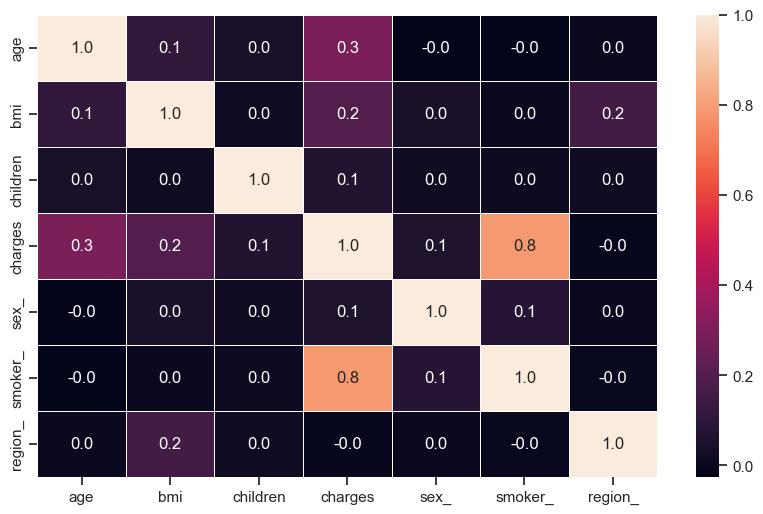

In [263]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

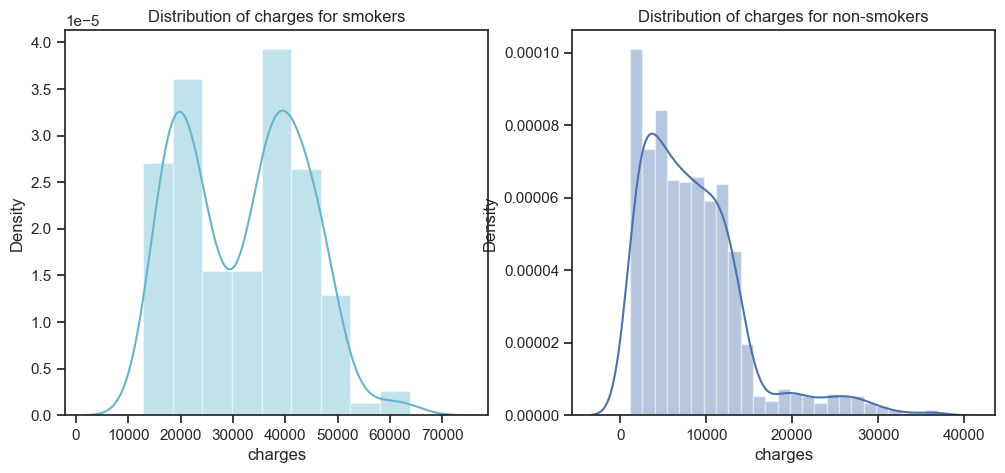

In [264]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(data[(data.smoker_ == 1)]["charges"],color='c')
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker_ == 0)]['charges'],color='b')
ax.set_title('Distribution of charges for non-smokers')

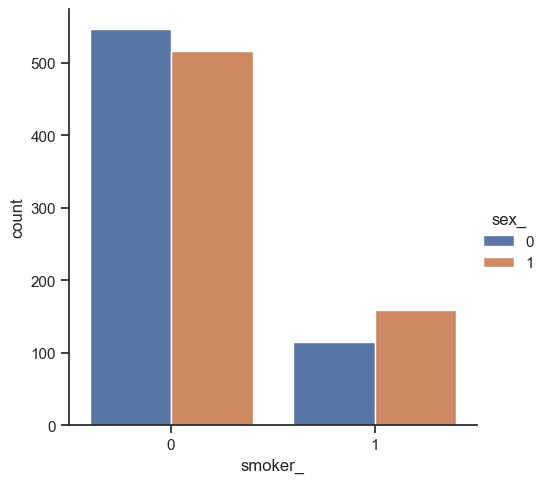

In [265]:
sns.catplot(x="smoker_", kind="count",hue = 'sex_', data=data)

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker_'>

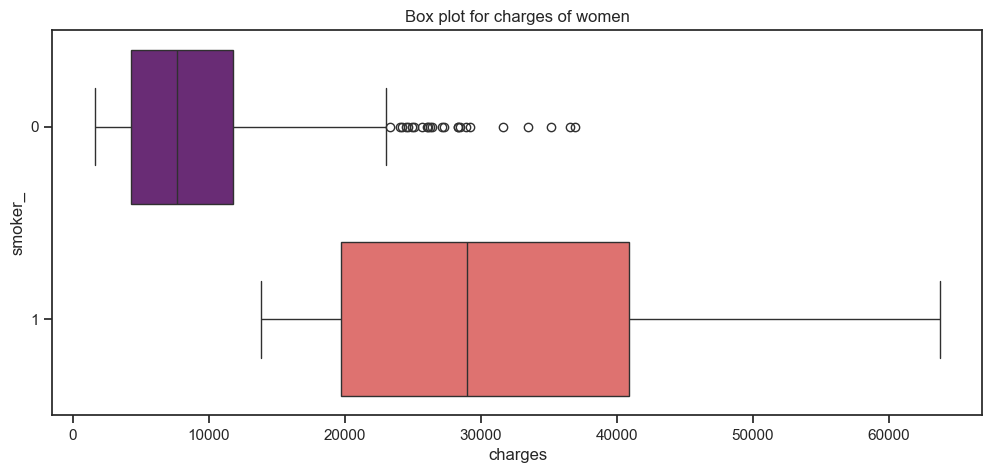

In [266]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of women")
sns.boxplot(y="smoker_", x="charges", data =  data[(data.sex_ == 0)] , orient="h", palette = 'magma')

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker_'>

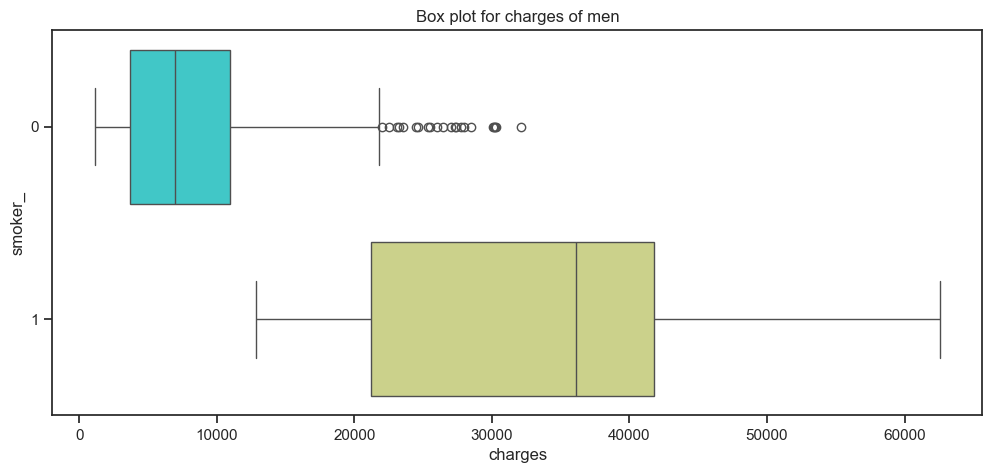

In [267]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker_", x="charges", data =  data[(data.sex_ == 1)] , orient="h", palette = 'rainbow')

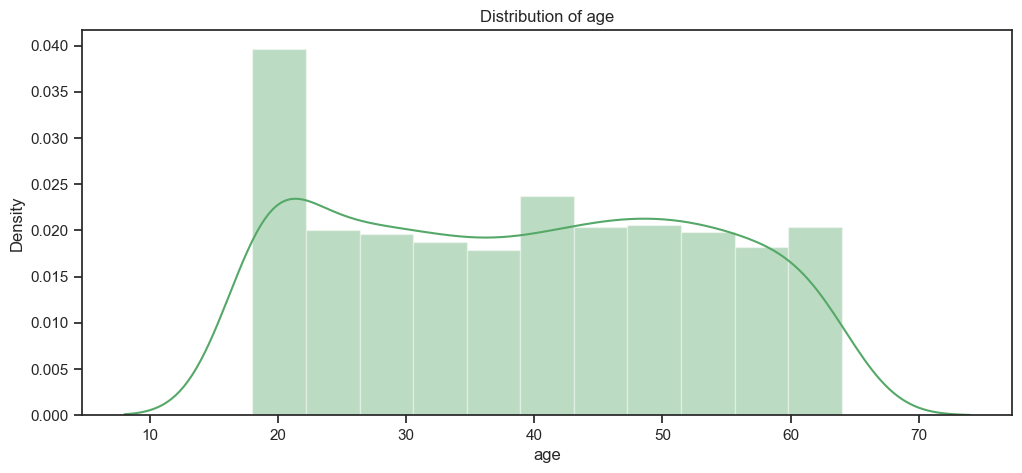

In [268]:
plt.figure(figsize=(12,5))
plt.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'g')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

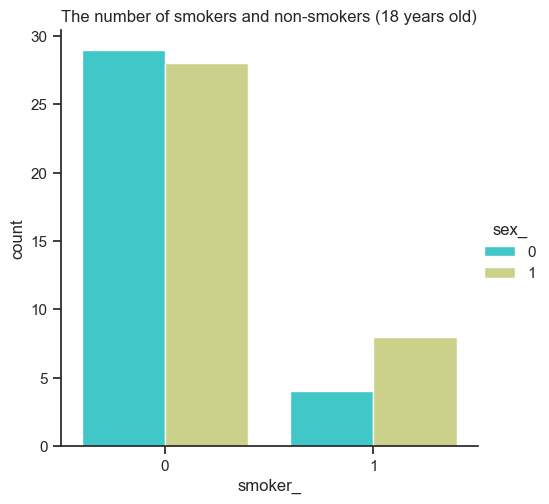

In [269]:
sns.catplot(x="smoker_", kind="count",hue = 'sex_', palette="rainbow", data=data[(data.age == 18)])
plt.title("The number of smokers and non-smokers (18 years old)")

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker_'>

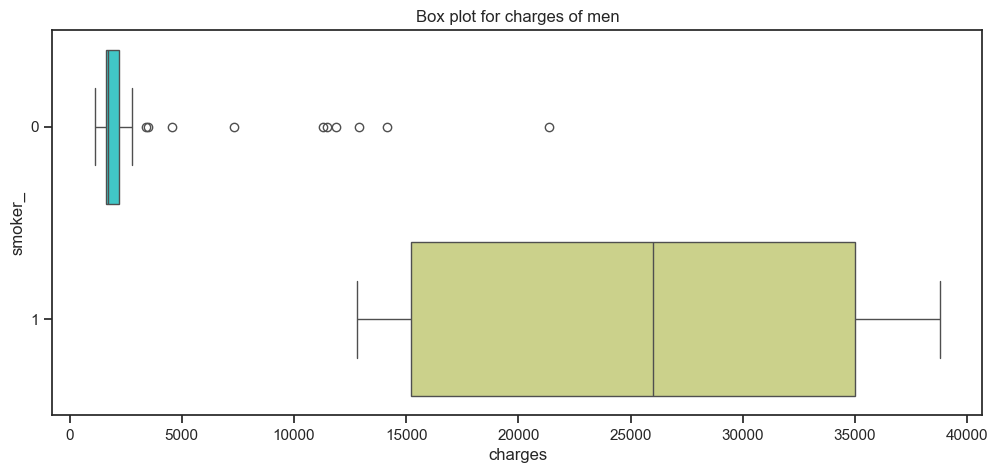

In [270]:
plt.figure(figsize=(12,5))
plt.title("Box plot for charges of men")
sns.boxplot(y="smoker_", x="charges", data =  data[(data.age == 18)] , orient="h", palette = 'rainbow')

<Axes: xlabel='bmi', ylabel='charges'>

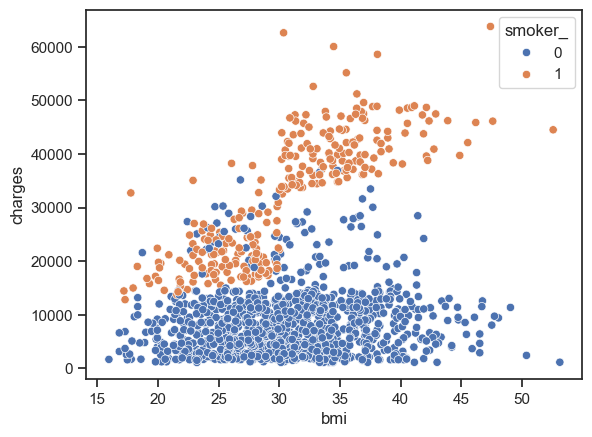

In [271]:
sns.scatterplot(data=data,x='bmi',y='charges',hue='smoker_')

<Axes: xlabel='age', ylabel='charges'>

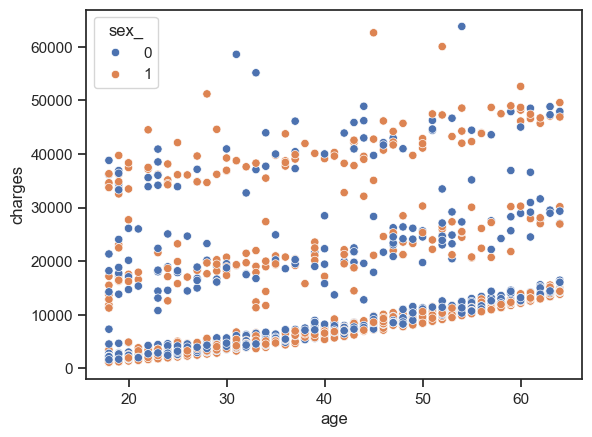

In [272]:
sns.scatterplot(data=data,x='age',y='charges',hue='sex_')

In [274]:
X=data.drop(['charges','region_'],axis=1)
y=data['charges']

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44, shuffle =True)

#Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (1070, 5)
X_test shape is  (268, 5)
y_train shape is  (1070,)
y_test shape is  (268,)


In [276]:
LinearRegressionModel = LinearRegression(fit_intercept=True,copy_X=True,n_jobs=-1)
LinearRegressionModel.fit(X_train, y_train)
y_pred = LinearRegressionModel.predict(X_test)
r2_scoreValue = r2_score(y_test, y_pred) 
print('r2_score Value is : ', r2_scoreValue)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

r2_score Value is :  0.7527823626575791
Mean Absolute Error Value is :  4060.9213136356557


In [277]:
for i,j in zip (y_test[:2],y_pred[:2]):
    print(f'reel value is {i} and pred value is {j} and cost func is {abs(i-j)}')

reel value is 4738.2682 and pred value is 7035.35190691925 and cost func is 2297.0837069192494
reel value is 2055.3249 and pred value is 3837.2276010180194 and cost func is 1781.9027010180193


In [278]:
PRmodel=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
PRmodel.fit(X_train,y_train)
y_pred=PRmodel.predict(X_test)
r2_scoreValue = r2_score(y_test, y_pred) 
print('r2_score Value is : ', r2_scoreValue)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

r2_score Value is :  0.8476373076079177
Mean Absolute Error Value is :  2770.2633781081704


In [279]:
for i,j in zip (y_test[:2],y_pred[:2]):
    print(f'reel value is {i} and pred value is {j} and cost func is {abs(i-j)}')

reel value is 4738.2682 and pred value is 6590.590580607815 and cost func is 1852.322380607815
reel value is 2055.3249 and pred value is 3353.7046333799335 and cost func is 1298.3797333799334


In [280]:
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)
y_pred = RandomForestRegressorModel.predict(X_test)
r2_scoreValue = r2_score(y_test, y_pred) 
print('r2_score Value is : ', r2_scoreValue)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average')
print('Mean Absolute Error Value is : ', MAEValue)

r2_score Value is :  0.8361885006109603
Mean Absolute Error Value is :  3097.206391074108


In [281]:
for i,j in zip (y_test[:2],y_pred[:2]):
    print(f'reel value is {i} and pred value is {j} and cost func is {abs(i-j)}')

reel value is 4738.2682 and pred value is 5557.522975563357 and cost func is 819.2547755633568
reel value is 2055.3249 and pred value is 5557.522975563357 and cost func is 3502.198075563357
